In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv('/content/tesla-stock-price.csv')

In [ ]:
data.head()

,date,close,volume,open,high,low
0,11:34,270.49,"4,787,699",264.50,273.88,262.2400
1,2018/10/15,259.59,6189026.0000,259.06,263.28,254.5367
2,2018/10/12,258.78,7189257.0000,261.00,261.99,252.0100
3,2018/10/11,252.23,8128184.0000,257.53,262.25,249.0300
4,2018/10/10,256.88,12781560.0000,264.61,265.51,247.7700


In [ ]:
for i in data.date:
  if '2016'in i:
    print(i)

2016/12/30
2016/12/29
2016/12/28
2016/12/27
2016/12/23
2016/12/22
2016/12/21
2016/12/20
2016/12/19
2016/12/16
2016/12/15
2016/12/14
2016/12/13
2016/12/12
2016/12/09
2016/12/08
2016/12/07
2016/12/06
2016/12/05
2016/12/02
2016/12/01
2016/11/30
2016/11/29
2016/11/28
2016/11/25
2016/11/23
2016/11/22
2016/11/21
2016/11/18
2016/11/17
2016/11/16
2016/11/15
2016/11/14
2016/11/11
2016/11/10
2016/11/09
2016/11/08
2016/11/07
2016/11/04
2016/11/03
2016/11/02
2016/11/01
2016/10/31
2016/10/28
2016/10/27
2016/10/26
2016/10/25
2016/10/24
2016/10/21
2016/10/20
2016/10/19
2016/10/18
2016/10/17
2016/10/14
2016/10/13
2016/10/12
2016/10/11
2016/10/10
2016/10/07
2016/10/06
2016/10/05
2016/10/04
2016/10/03
2016/09/30
2016/09/29
2016/09/28
2016/09/27
2016/09/26
2016/09/23
2016/09/22
2016/09/21
2016/09/20
2016/09/19
2016/09/16
2016/09/15
2016/09/14
2016/09/13
2016/09/12
2016/09/09
2016/09/08
2016/09/07
2016/09/06
2016/09/02
2016/09/01
2016/08/31
2016/08/30
2016/08/29
2016/08/26
2016/08/25
2016/08/24
2016/08/23

In [ ]:
data.drop(index = 0,inplace = True)

In [ ]:
data['date'] = pd.to_datetime(data['date'])

In [ ]:
data.set_index('date',inplace = True)
data.sort_index(inplace = True)

In [ ]:
data1 = data['close']['2016/01/04':'2016/12/30']

<Axes: xlabel='date'>

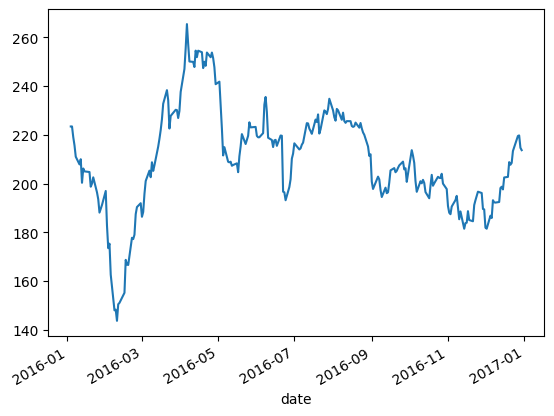

In [ ]:
data1.plot()

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
adfuller(data1)

(-2.1342971121183556,
 0.23094899817964137,
 1,
 250,
 {'1%': -3.456780859712, '5%': -2.8731715065600003, '10%': -2.572968544},
 1411.4445858994525)

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
result = seasonal_decompose(data1,period = 60)

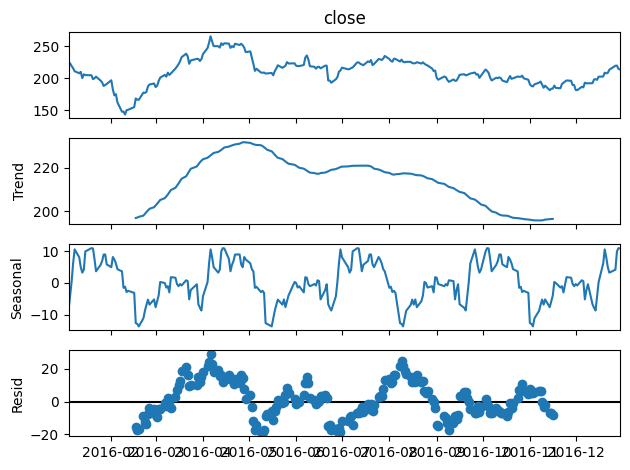

In [ ]:
result.plot();

In [ ]:
data_diff = data1-data1.shift(1)
data_diff.dropna(inplace = True)

In [ ]:
adfuller(data_diff)

(-13.771721228232638,
 9.654626708208984e-26,
 0,
 250,
 {'1%': -3.456780859712, '5%': -2.8731715065600003, '10%': -2.572968544},
 1408.7948933678201)

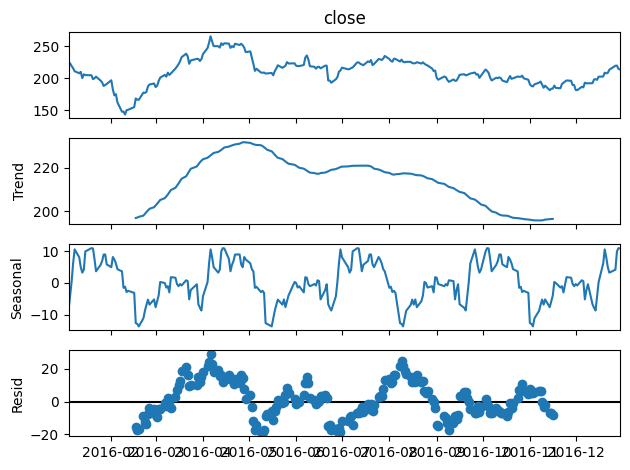

In [ ]:
result = seasonal_decompose(data1,period = 60)
result.plot();

<Axes: xlabel='date'>

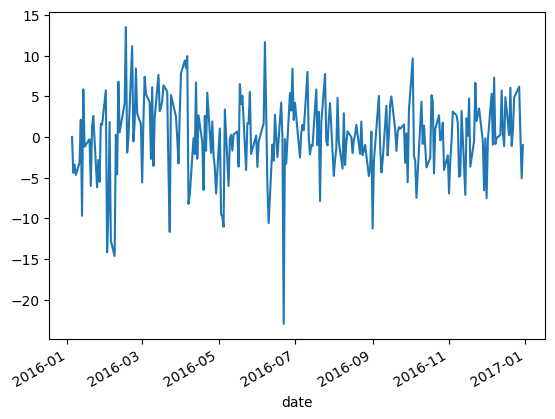

In [ ]:
data_diff.plot()

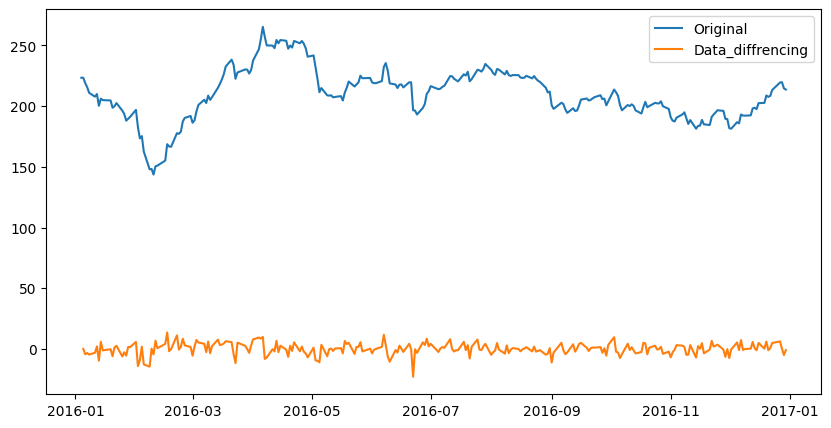

In [ ]:
plt.figure(figsize = (10,5))
plt.plot(data1,label = 'Original')
plt.plot(data_diff,label = 'Data_diffrencing')
plt.legend()
plt.show()

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

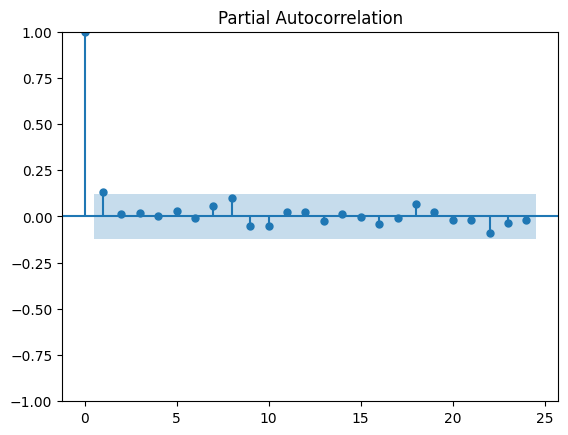

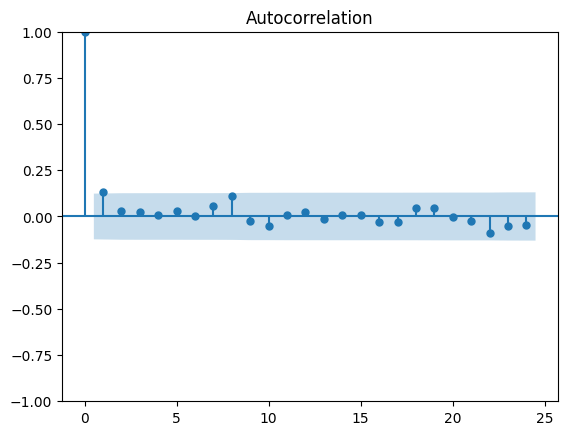

In [ ]:
plot_pacf(data_diff)
plot_acf(data_diff);

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
model_ar = ARIMA(data_diff,order = (1,1,1))
model_ar = model_ar.fit()
model_ar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  close   No. Observations:                  251
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -752.186
Date:                Fri, 03 Nov 2023   AIC                           1510.372
Time:                        08:38:50   BIC                           1520.937
Sample:                             0   HQIC                          1514.624
                                - 251                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1372      0.064      2.150      0.032       0.012       0.262
ma.L1         -1.0000      8.551     -0.117      0.907     -17.760      15.760
sigma2        23.5348    200.926      0.117      0.907    -370.272     417.342
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                40.49
Prob(Q):                              0.89   Prob(JB):                         0.00
Heteroskedasticity (H):               0.41   Skew:                            -0.48
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.72
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

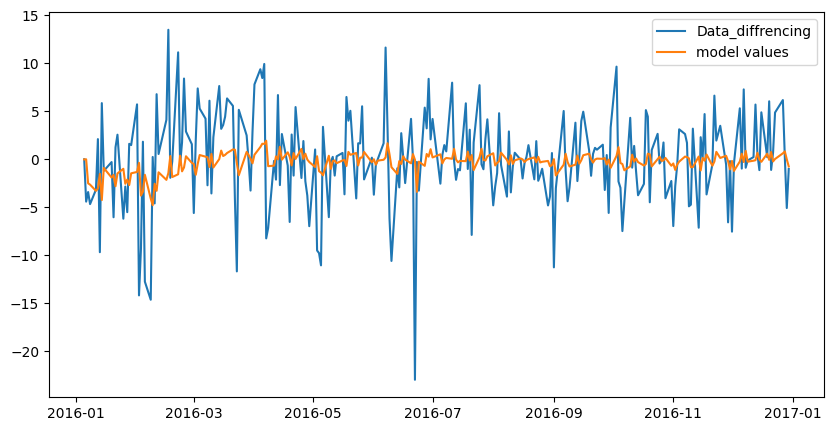

In [ ]:
plt.figure(figsize = (10,5))
plt.plot(data_diff,label = 'Data_diffrencing')
plt.plot(model_ar.fittedvalues,label = 'model values')
plt.legend()
plt.show()

In [ ]:
!pip install -q pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 8.4 MB/s eta 0:00:00


In [ ]:
from pmdarima.arima import auto_arima

In [ ]:
model_auto = auto_arima(data_diff,start_p = 0,start_q = 0,
           max_p = 3, max_q = 3,
           stationary = True, test = 'adf', d = 1)

In [ ]:
model_auto = model_auto.fit(data_diff)

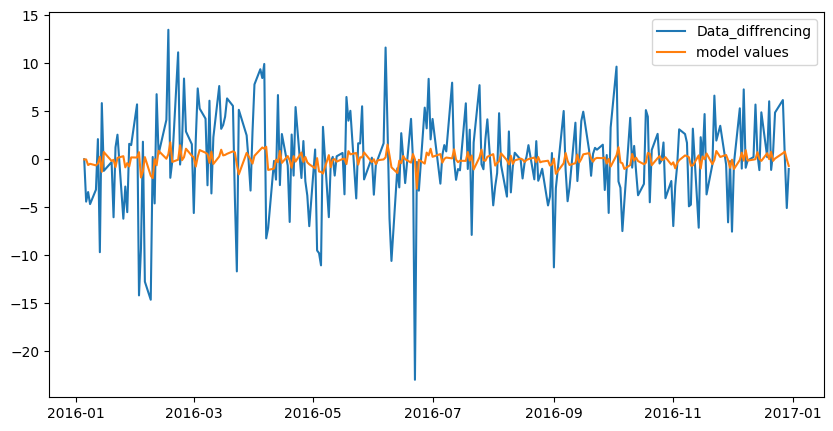

In [ ]:
plt.figure(figsize = (10,5))
plt.plot(data_diff,label = 'Data_diffrencing')
plt.plot(model_auto.fittedvalues(),label = 'model values')
plt.legend()
plt.show()

In [ ]:
dat_ar = model_ar.fittedvalues+data1.shift(1)
dat_ar = dat_ar.dropna()
dat_aar = model_auto.fittedvalues()+data1.shift(1)
dat_aar = dat_aar.dropna()

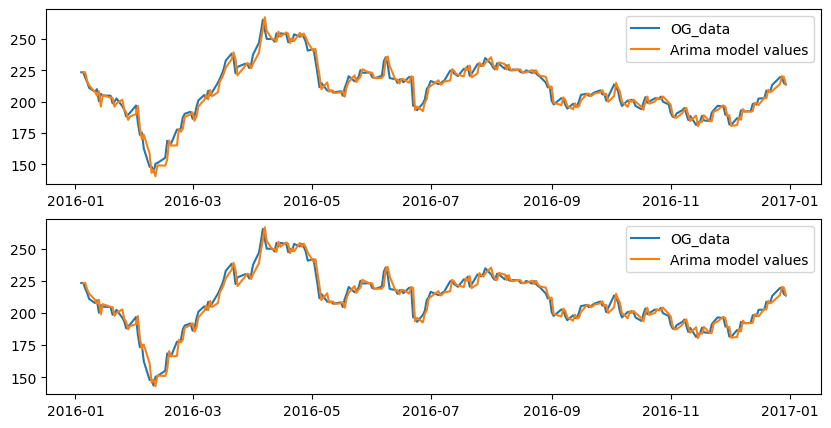

In [ ]:
plt.figure(figsize = (10,5))
plt.subplot(2,1,1)
plt.plot(data1,label = 'OG_data')
plt.plot(dat_ar,label = 'Arima model values')
plt.legend()
plt.subplot(2,1,2)
plt.plot(data1,label = 'OG_data')
plt.plot(dat_aar,label = 'Arima model values')
plt.legend()
plt.show()

In [ ]:
model_s = SARIMAX(data_diff,order = (1,1,1),seasonal_order=(0,0,0,5))
model_s = model_s.fit()

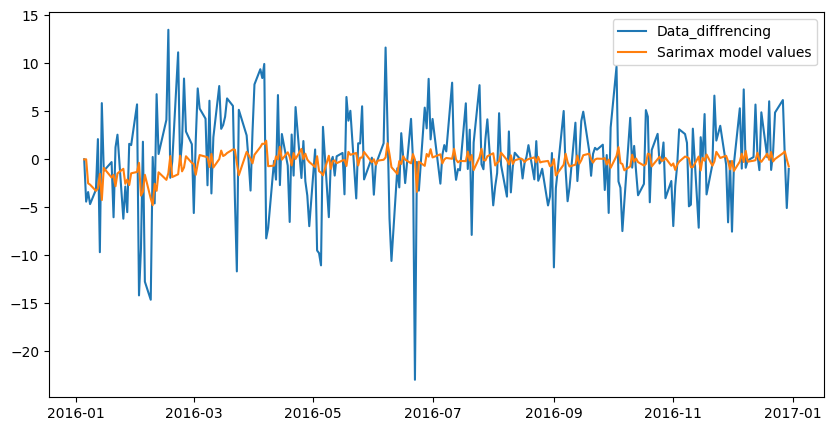

In [ ]:
plt.figure(figsize = (10,5))
plt.plot(data_diff,label = 'Data_diffrencing')
plt.plot(model_s.fittedvalues,label = 'Sarimax model values')
plt.legend()
plt.show()

In [ ]:
model_s = SARIMAX(data_diff,order = (1,1,1),seasonal_order=(0,0,0,0))
model_s = model_s.fit()

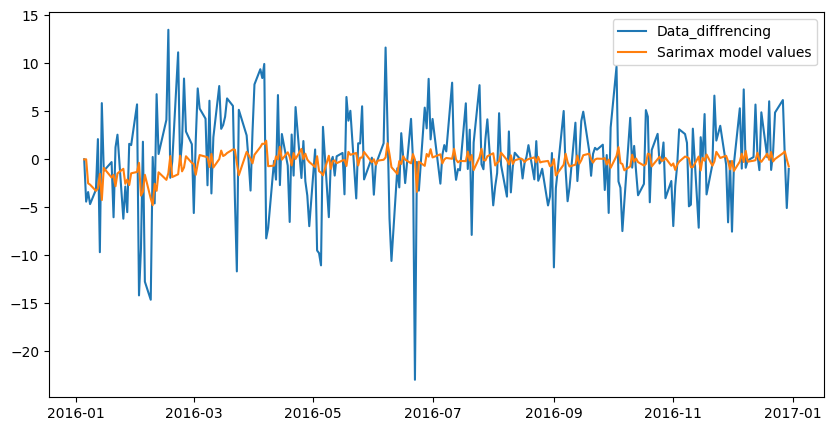

In [ ]:
plt.figure(figsize = (10,5))
plt.plot(data_diff,label = 'Data_diffrencing')
plt.plot(model_s.fittedvalues,label = 'Sarimax model values')
plt.legend()
plt.show()

In [ ]:
model_sa = SARIMAX(data_diff,order = (1,0,0),seasonal_order=(0,0,0,0))
model_sa = model_sa.fit()

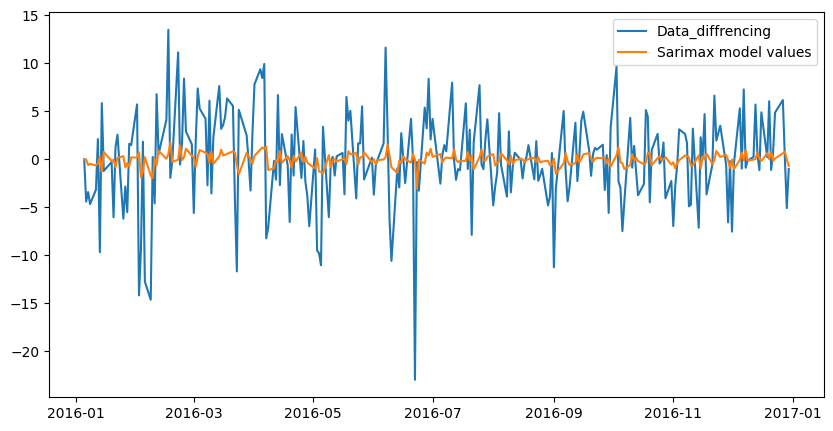

In [ ]:
plt.figure(figsize = (10,5))
plt.plot(data_diff,label = 'Data_diffrencing')
plt.plot(model_sa.fittedvalues,label = 'Sarimax model values')
plt.legend()
plt.show()

In [ ]:
da = model_s.fittedvalues+data1.shift(1)
da = da.dropna()
da1 = model_sa.fittedvalues+data1.shift(1)
da1 = da1.dropna()

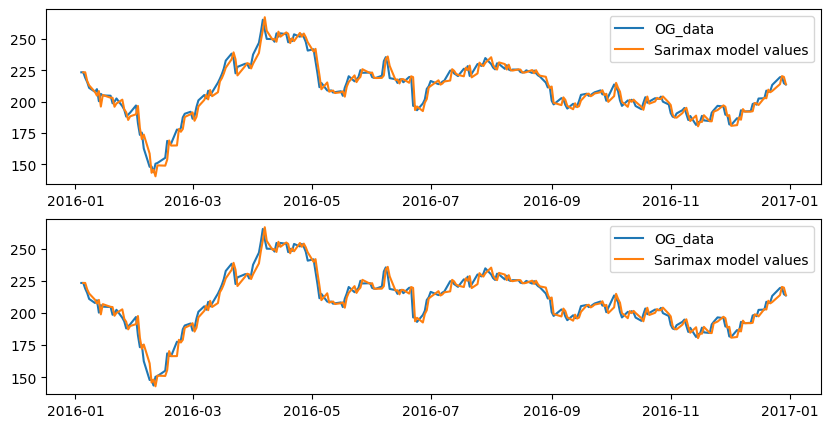

In [ ]:
plt.figure(figsize = (10,5))
plt.subplot(2,1,1)
plt.plot(data1,label = 'OG_data')
plt.plot(da,label = 'Sarimax model values')
plt.legend()
plt.subplot(2,1,2)
plt.plot(data1,label = 'OG_data')
plt.plot(da1,label = 'Sarimax model values')
plt.legend()
plt.show()

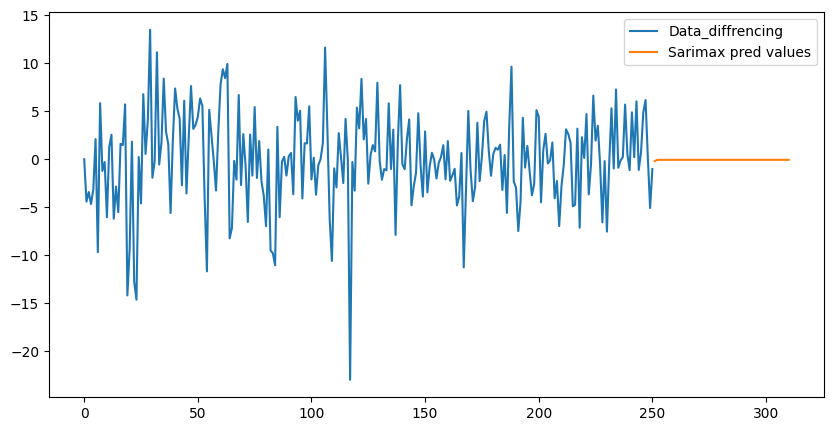

In [ ]:
pred_sa = model_s.forecast(steps = 60)

plt.figure(figsize = (10,5))
plt.plot(data_diff.values,label = 'Data_diffrencing')
plt.plot(pred_sa,label = 'Sarimax pred values')
plt.legend()
plt.show()